<a href="https://colab.research.google.com/github/alishbaaramzan/Bookstore-Management-System/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

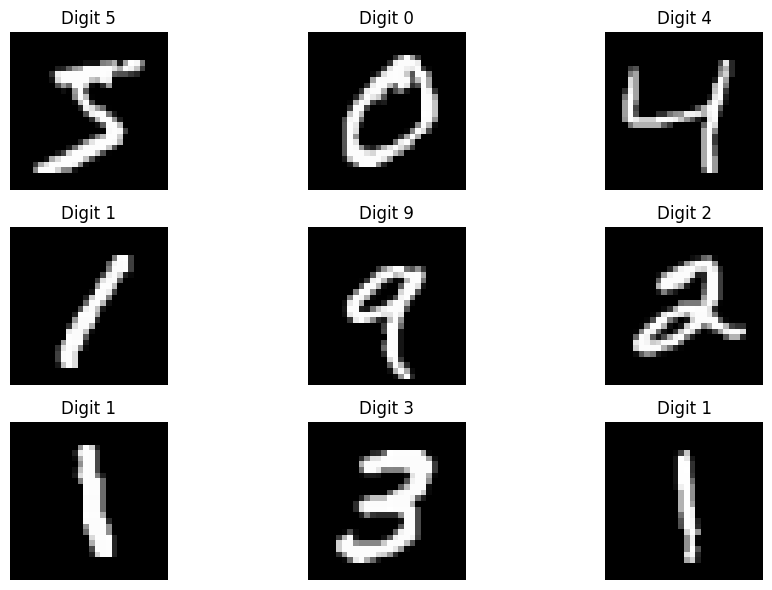

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

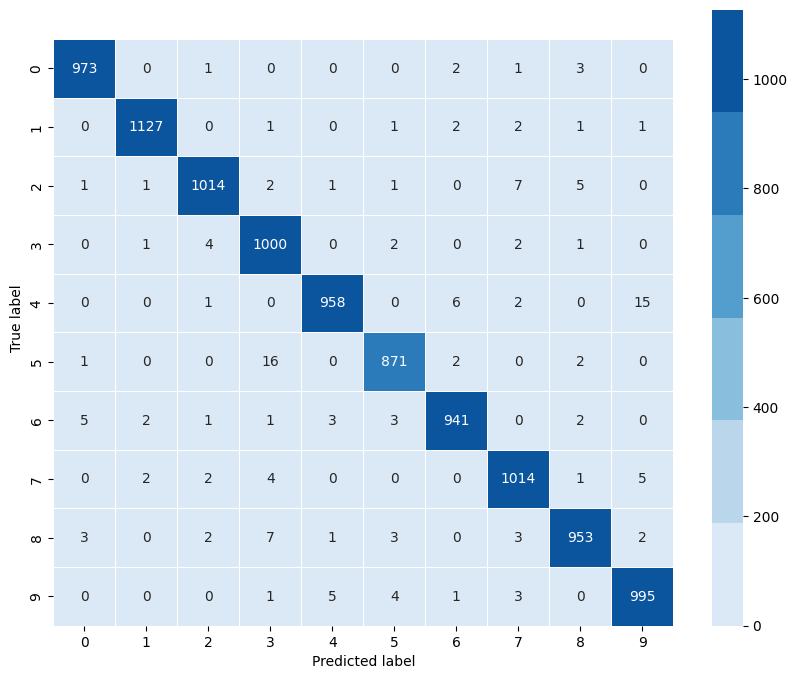

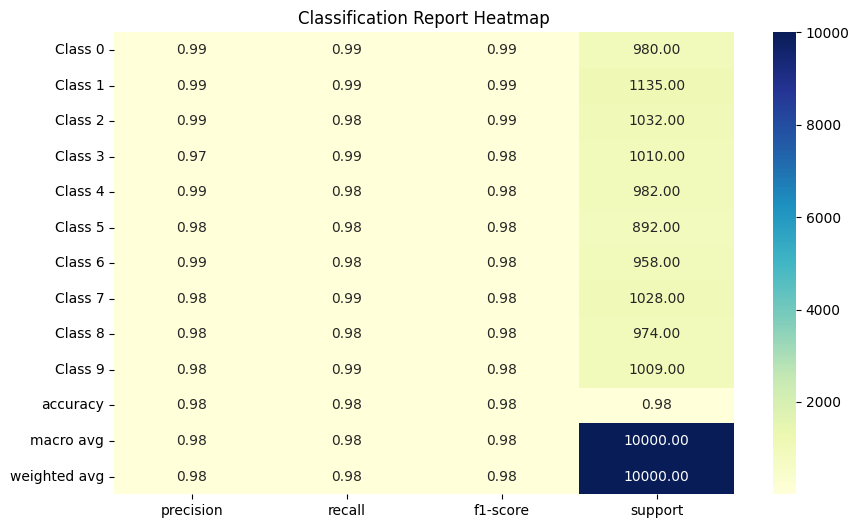

1/1 [==============================] - 0s 17ms/step


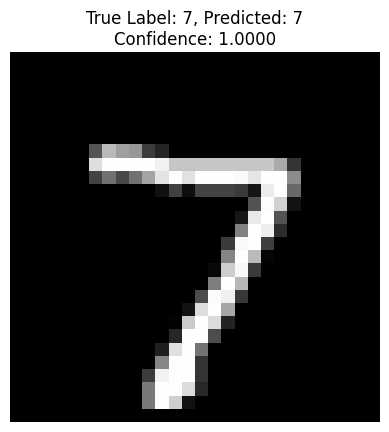

In [5]:
#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model

# load dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Add a new axis
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

# encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# data standardization
x_train = x_train / 255.0
x_test = x_test / 255.0

# data visualization
plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')  # use squeeze() to remove the singleton dimension
    plt.axis('off')
    plt.title('Digit {}'.format(np.argmax(y_train[i])))  # use np.argmax to get the digit value
plt.tight_layout()
plt.show()

# training model
model = Sequential()
# Layer 1 Conv2D
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=x_train[0].shape,
                 padding="same"))
# Layer 2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# Layer 3 Conv2D
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# Layer 4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Dense(units=120, activation='tanh'))
model.add(Dense(units=84, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

# number of trainable parameters
model.summary()

# fitting the model
model.fit(x_train, y=y_train, epochs=10)

# model architecture
plot_model(model, to_file='model_1.png', show_shapes=True)

# confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test), axis=1),
                             labels=list(np.arange(0, 10)))

# heatmap
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion, annot=True, ax=ax, fmt="d", linewidths=.5, cmap=sns.color_palette("Blues"))
plt.ylim([10, -0.5])
plt.ylabel('True label')
plt.xlabel('Predicted label')

# classification report
from sklearn.metrics import classification_report

target_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8",
                "Class 9"]
print(classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test), axis=1),
                            target_names=target_names))
report = classification_report(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test), axis=1),
                               target_names=target_names, output_dict=True)

report_data = report
report_df = pd.DataFrame(report_data).transpose()

# heatmap for the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

# Select a test sample
sample_index = 0
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]

# Add a batch dimension
sample_image_batch = sample_image[np.newaxis, ...]

# Make a prediction
prediction = model.predict(sample_image_batch)

# Convert prediction to a human-readable format
predicted_class = np.argmax(prediction)
confidence = prediction[0, predicted_class]

# Display the image
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True Label: {np.argmax(sample_label)}, Predicted: {predicted_class}\nConfidence: {confidence:.4f}")
plt.axis('off')
plt.show()
